In [1]:
import pandas as pd
import geopandas as gpd
import movingpandas as mpd
import numpy as np
from datetime import timedelta, datetime
import folium
import warnings
import pickle
import sys

warnings.filterwarnings('ignore')

print("Geopandas has version {}".format(gpd.__version__))
print("Movingpandas has version {}".format(mpd.__version__))

Geopandas has version 0.13.2
Movingpandas has version 0.17.1


In [2]:
# add paths for modules
sys.path.append('../models')
# import modules
import visualize
from maritime_traffic_network import MaritimeTrafficNetwork

In [3]:
# load network from pickle
model = '202204_waypoints_DP10_HDBSCAN15_stavanger_full_UTM_filtered'
model_path = '../../models/networks/' + model + '.obj'
fileObj = open(model_path, 'rb')
network = pickle.load(fileObj)
fileObj.close()

In [4]:
# merge stop points
network.merge_stop_points(max_speed=2)

In [5]:
# prune
network.prune_graph(20)

------------------------
Pruned Graph:
Number of nodes: 1835 (17 isolated)
Number of edges: 3875
------------------------



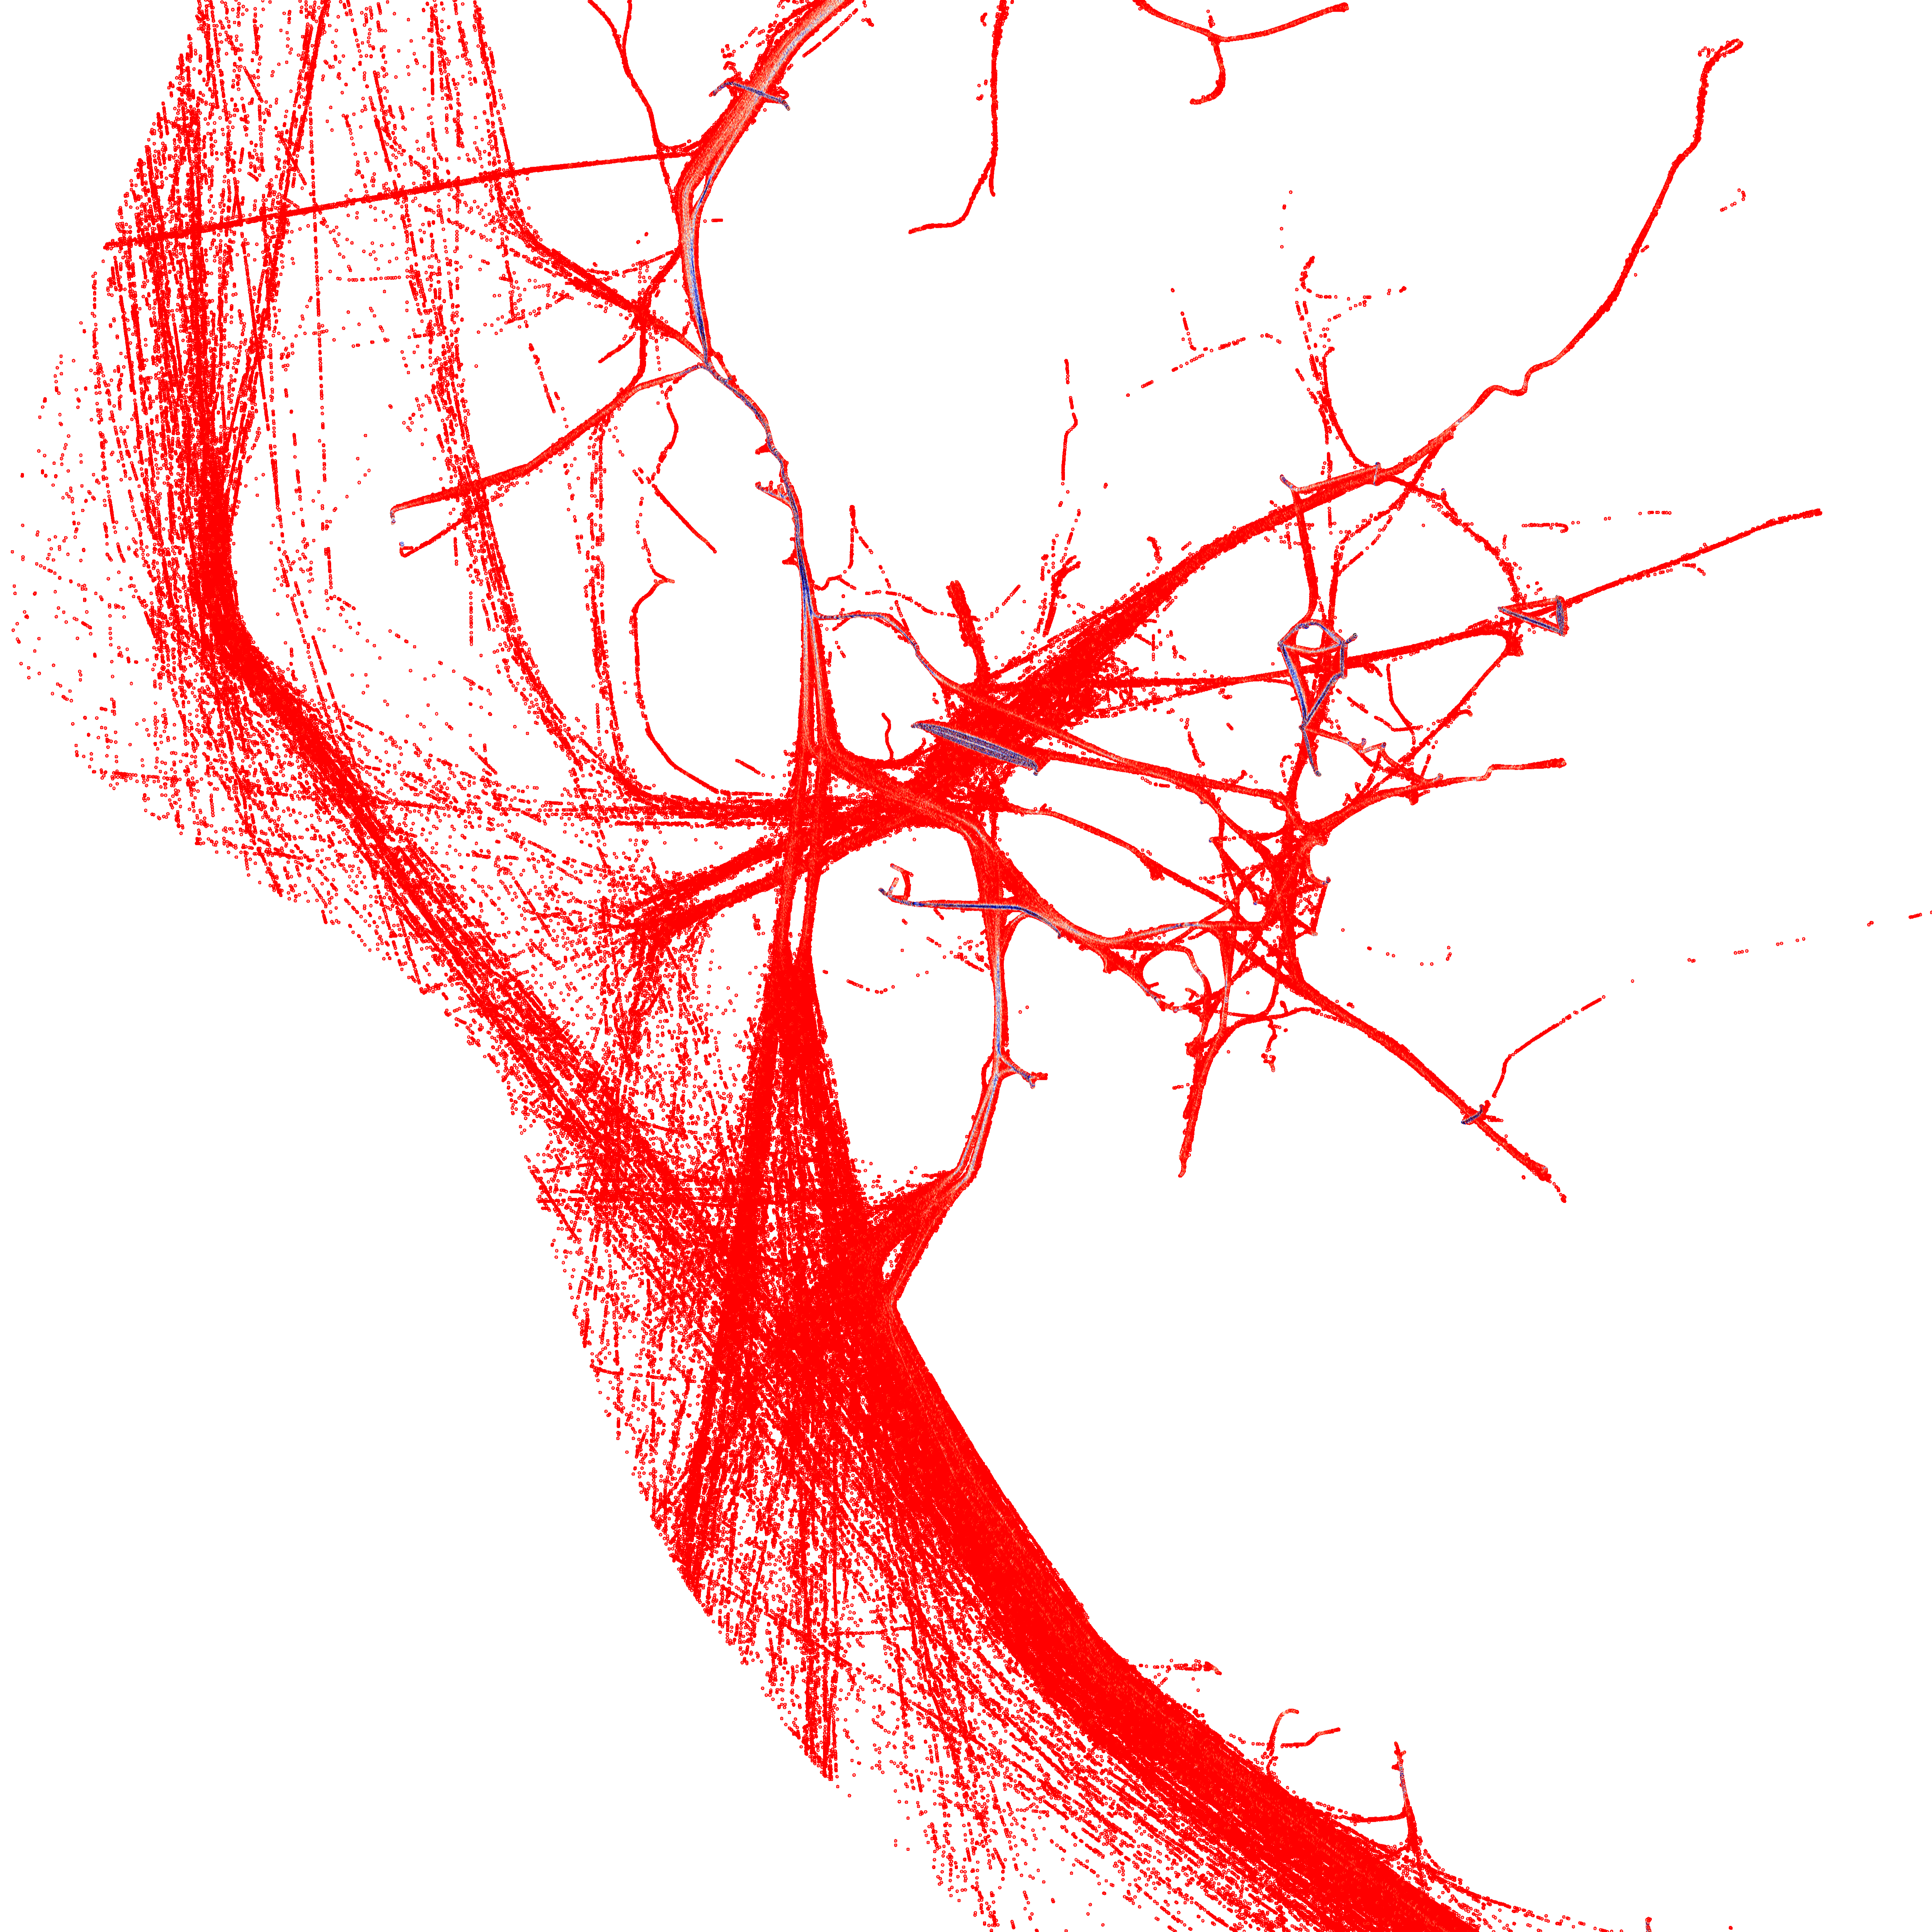

In [6]:
map = network.map_graph(pruned=True)
folium.LayerControl().add_to(map)
map


In [7]:
#map.save('../../reports/maps/202204_waypoints_DP2e-4_HDBSCAN30_stavanger_full.html')